In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris=datasets.load_iris()   # dane iris wewnętrzne

In [3]:
dane = pd.DataFrame(iris.data, columns=iris.feature_names)
dane['label']=iris.target

dane.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
dane.to_csv('iris_dane.csv',index=None)

In [4]:
storczyki=pd.read_csv('iris_dane.csv') # dane iris zewnętrzne

In [5]:
storczyki.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
storczyki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
label                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


**Exploratory Data Analysis**

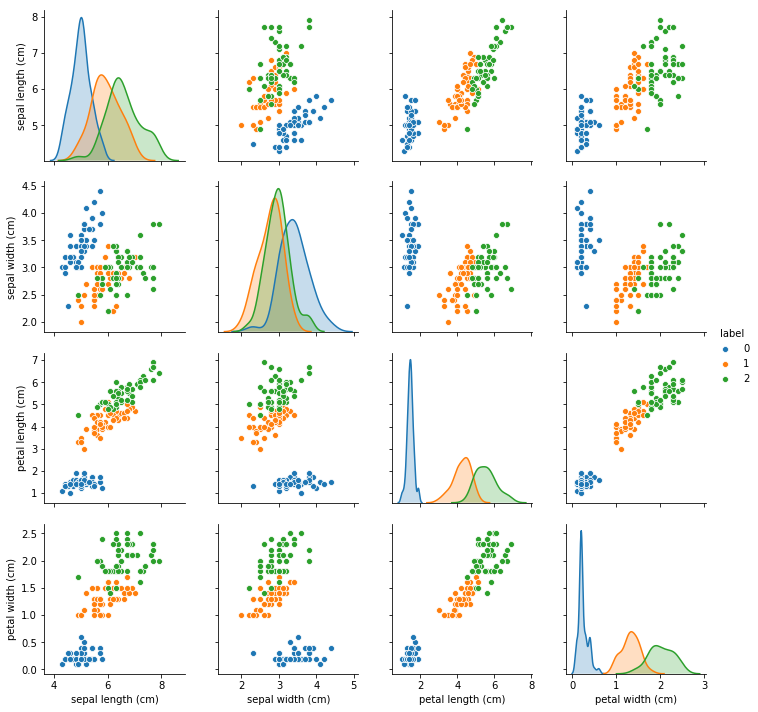

In [7]:
sns_plot=sns.pairplot(storczyki,vars=storczyki.columns[:-1],hue='label');

In [14]:
sns_plot.savefig('output.png')   # zapisanie w pliku

**Split into training and testing set**

In [9]:
features=storczyki.iloc[:,[0,1,2,3]]   # zmiana liczby features do modelu
target=storczyki.iloc[:,4]

In [10]:
X,X_test,y,y_test=train_test_split(features,target,test_size=0.3,random_state=41)
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


**Model**

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
gnb=GaussianNB()
mod=gnb.fit(X,y)

In [13]:
y_pred=gnb.predict(X_test)

In [14]:
print(round(100-(y_test!=y_pred).sum()/len(y_test)*100,2),(y_test!=y_pred).sum())

91.11 4


In [15]:
proc=np.zeros((100),float)

In [16]:
# sto razy obliczona procentowa dokładność (accuracy)
for i in range(0,100):
    X,X_test,y,y_test=train_test_split(features,target,test_size=0.3,random_state=i)
    gnb=GaussianNB()
    mod=gnb.fit(X,y)
    y_pred=gnb.predict(X_test)
    proc[i]=round(100-((y_test!=y_pred).sum()/len(y_test)*100),2)
print(proc.mean())
print(proc.std())
print(proc.min(),proc.max())

95.31220000000002
2.9972245761704284
86.67 100.0
